<a href="https://colab.research.google.com/github/FariaParvinMegha/thesis/blob/main/SNR2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


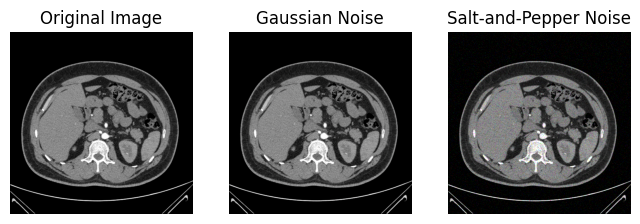

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = "/content/drive/MyDrive/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Normal/Normal- (10).jpg"
image = cv2.imread(image_path)

# Display the original image
plt.figure(figsize=(8, 8))
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

# Function to add Gaussian noise
def add_gaussian_noise(image, mean=0, sigma=.5):
    row, col, ch = image.shape
    gauss = np.random.normal(mean, sigma, (row, col, ch))
    noisy = image + gauss
    return np.clip(noisy, 0, 255).astype(np.uint8)

# Function to add salt-and-pepper noise
def add_salt_and_pepper_noise(image, salt_prob=0.02, pepper_prob=0.02, salt_intensity=200, pepper_intensity=200):
    row, col, ch = image.shape
    noisy = image.copy()

    # Add salt noise
    salt_pixels = np.random.choice((0, 1), size=(row, col, ch), p=[1 - salt_prob, salt_prob])
    noisy[salt_pixels == 1] = 50

    # Add pepper noise
    pepper_pixels = np.random.choice((0, 1), size=(row, col, ch), p=[1 - pepper_prob, pepper_prob])
    noisy[pepper_pixels == 1] = 50

    return noisy

# Add Gaussian noise
noisy_gaussian = add_gaussian_noise(image)

# Add salt-and-pepper noise
noisy_sp = add_salt_and_pepper_noise(image)

# Display images with noise
plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(noisy_gaussian, cv2.COLOR_BGR2RGB))
plt.title('Gaussian Noise')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(noisy_sp, cv2.COLOR_BGR2RGB))
plt.title('Salt-and-Pepper Noise')
plt.axis('off')

plt.show()


In [3]:
import numpy as np

# Function to calculate SNR
def calculate_snr(original_image, noisy_image):
    # Convert images to float for numerical calculations
    original_image = original_image.astype(float)
    noisy_image = noisy_image.astype(float)

    # Calculate Mean Squared Error (MSE)
    mse = np.mean((original_image - noisy_image) ** 2)

    # Calculate Original Power
    original_power = np.mean(original_image ** 2)

    # Calculate SNR in dB
    snr = 10 * np.log10(original_power / mse)

    return snr

# Assuming 'image' is the original image
# 'noisy_gaussian' and 'noisy_sp' are the images with Gaussian and salt-and-pepper noise, respectively
original_image = cv2.imread(image_path)

# Calculate SNR for Gaussian noise
snr_gaussian = calculate_snr(original_image, noisy_gaussian)
print(f"SNR for Gaussian Noise: {snr_gaussian:.2f} dB")

# Calculate SNR for salt-and-pepper noise
snr_sp = calculate_snr(original_image, noisy_sp)
print(f"SNR for Salt-and-Pepper Noise: {snr_sp:.2f} dB")


SNR for Gaussian Noise: 43.18 dB
SNR for Salt-and-Pepper Noise: 16.21 dB
